# **Machine Learning and Data Science MLDS**
# Applied Project - Module 1



September 23rd, 2023.

By: Maria Camila Ortiz

# **Climate Change Insights**
Climate change is a reality that affects all current processes (ecosystem, atmospheric, oceanic, social, economic, etc.). These processes in general are related to each other. Deepening the knowledge of its variables can contribute to making decisions that mitigate these impacts or prevent their effects.

# Objectives:
* To process the climate change dataset downloaded from Kaggle, in order to obtain descriptive information regarding its features, with temperature as the main variable.
* To analyze the behavior of the variables Temperature, Sea Level Rise and Precipitation during the years 2000 and 2002, to identify valuable information between patterns 20 years apart.
* To generate general information regarding the correlations found between all the variables involved.


# General Information:

This dataset was downloaded from Kaggle, its usability is a 100%. Its features are:
* **Date**
* **Location**
* **Country**
* **Temperature** (celsius)
* **CO2 emissions** (parts per million)
* **Sea Level Rise** (millimeters)
* **Precipitation** (millimeters)
* **Humidity** (relative humidity %)
* **Wind Speed** (kilometers per hour)

In [23]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import statsmodels.api as sm
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [24]:
!pip install -U plotly
!pip install -U kaleido

In [25]:
#Data Reading
df = pd.read_csv('climate_change_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


# Initial Data Exploration

In [26]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [27]:
#Taking a look into some stats
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


# Data Cleaning

In [30]:
#Null Values Reviewing
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

There are not null values in the dataset, so it is not necessary to remove something applying the dropna method. It is also seen in the min and max values that there are not outliers. It is due the usability of the dataset, as it's already cleaned from kaggle. Anyway, the date format has information that would not be necessary in this project, so there will be a cleaning process related to it.

In [37]:
#Changing the date column format to datetime and getting only dates
df['Date'] = pd.to_datetime(df['Date']).round('D')
df['Date']

0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-04
          ...    
9995   2022-12-28
9996   2022-12-28
9997   2022-12-29
9998   2022-12-30
9999   2022-12-31
Name: Date, Length: 10000, dtype: datetime64[ns]

In [38]:
#Assigning the column date as index, for visualization purposes
df.set_index('Date', inplace=True)

# Data Analysis

In [39]:
#Grouping by country and getting the means
df.groupby('Country').mean()

<ipython-input-39-c6f64137dae4>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Country,,,,,,
Afghanistan,14.730345,403.029928,0.121724,47.152730,49.658014,23.858839
Albania,15.646637,403.086827,-0.251437,56.265142,54.208546,25.883135
Algeria,14.496989,401.639539,-0.343974,46.274362,48.237590,20.667563
American Samoa,15.895872,392.449374,0.156509,48.997182,53.647845,23.747529
Andorra,15.074974,410.238930,-0.030364,50.296133,47.764732,23.269450
...,...,...,...,...,...,...
Wallis and Futuna,14.827670,395.606024,-0.005426,44.844348,43.899724,28.297726
Western Sahara,15.386609,384.047327,0.021748,56.078378,47.417445,27.933374
Yemen,15.140053,392.016930,0.099056,49.923319,47.415821,22.066149


This dataset counts with 243 different countries. Currenty (year 2023) there are only 203 countries in the world, which means there is a possibitily of finding inconsistencies in the used names.

In [40]:
#Getting unique location values
df['Location'].nunique()

7764

There are also 7764 different locations, from where the measeurements were made. It is not possible to determine if there are inconsistencies in those used names.

In [41]:
#Getting data for Colombia
df_col = df[df['Country']=='Colombia']
df_col.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,,,,
2000-02-21,Charlesview,Colombia,3.282479,330.070767,-0.967105,42.750192,70.175534,0.187538
2000-08-11,West Rachel,Colombia,12.013228,369.233387,-1.480554,46.786862,64.024045,20.691127
2001-01-12,North Kenneth,Colombia,11.602866,397.146015,0.549405,70.763652,74.033410,21.242625
2001-11-11,Port Vanessa,Colombia,17.644319,484.373777,-0.853596,14.273695,11.796640,24.406777
2002-08-26,Lake Michaelhaven,Colombia,19.633279,460.032445,0.942081,20.839890,81.206206,6.228563


When extracting the dataset for **Colombia**, it is observed that the *Location* column has names that do not refer to Colombian cities. Therefore, it is inferred that this column does not refer to in situ measurements, but rather measurements that can be done remotely. An example of this would be through satellite information or atmospheric and hydrological models, among others.


In [42]:
df_col.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,14.950836,403.302552,0.132826,45.378531,62.893780,25.248311
std,5.000558,44.766588,1.202201,29.067110,26.691702,15.879375
min,3.282479,312.258462,-1.809063,0.182622,3.909628,0.187538
25%,11.795714,371.012817,-0.754018,20.140485,44.623110,14.142512
50%,16.154323,402.189184,0.158155,46.955708,73.447370,20.966876
75%,18.987465,433.020725,0.759515,66.408399,81.346916,42.686372
max,21.342615,489.843069,2.731834,98.224545,95.832804,49.276293


The values for **Colombia** are not far from the averages of the entire dataset. The *Humidity* variable for this country is one of those that is least close to the average and yet the difference is included in the standard deviation.


In [43]:
pd.options.plotting.backend = "plotly"

In [44]:
df_col['Temperature'].plot()

From this temperature time series for **Colombia**, it is observed that its behavior is irregular and it has nonperiodic crests and troughs. The higher value happened in march 2005, and the lower in jule, 2013. It is also seen that the meauserments are not perodic.


In [18]:
#Getting Datasets for years 2002 and 2022
df_2002 = df.loc['2002-01-01':'2002-12-31']
df_2022 = df.loc['2022-01-01':'2022-12-31']

In [45]:
#Geting some info about those datasets
df_2002.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,14.615243,395.385289,-0.103882,49.795180,50.498332,25.346605
std,5.030990,51.083346,0.975487,29.155078,28.861094,14.173349
min,-3.709565,241.219695,-3.390989,0.354641,0.028698,0.277389
25%,11.353092,359.884370,-0.728058,24.280962,24.421121,13.167081
50%,14.922873,395.254342,-0.098306,49.496216,53.393734,25.538401
75%,17.980873,427.601047,0.538809,76.096603,74.107226,37.377487
max,30.556774,529.836649,2.553176,99.865079,99.677525,49.903865


There are 435 no null data for 2022, which means that some of the days have more than 1 measurement.

In [46]:
df_2022.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,14.635067,398.854745,-0.002013,48.063045,47.984291,26.036792
std,4.979638,50.142112,0.986827,29.685209,28.343340,14.212185
min,0.312122,182.131220,-2.833930,0.063193,0.395232,0.087668
25%,11.383737,364.160633,-0.672605,21.381432,24.925241,13.611418
50%,14.864453,400.820189,0.000309,45.895920,46.963434,26.116235
75%,17.971348,430.549061,0.659996,74.784487,73.266939,38.857415
max,25.776005,533.633336,2.433106,99.971352,99.553650,49.809358


There are 434 no null data for 2022, which means that some of the days have more than 1 measurement.

In [47]:
#Temperature Boxplot 2002
fig = px.box(df_2002, y='Temperature', title='Temperature (°C) Boxplot - 2002')
fig.show()

The higher registered temperature for 2002, was 30.55°C, with a mean of 14.92°C. 50% of the registers are between 11.34°C and 17.98°C.

In [48]:
px.scatter( df_2002,            # Nombre del dataframe.
             x='Sea Level Rise',
             y= 'Precipitation',
             color = 'Temperature',
             size = 'Precipitation',
             title = 'Sea Level Rise, Precipitation and Temperature for 2002',
             labels = {'Sea Level Rise': 'Sea Level Rise (mm)',
                       'Precipitation': 'Precipitation (mm)',
                       'Temperature': 'Temperature °C'
                       })

In this case, it is possible to see that there is not a color pattern that could bring more information about the behavior of the Precipitation and the Sea Level Rise related to the Temperature, but it allows to see the distribution.

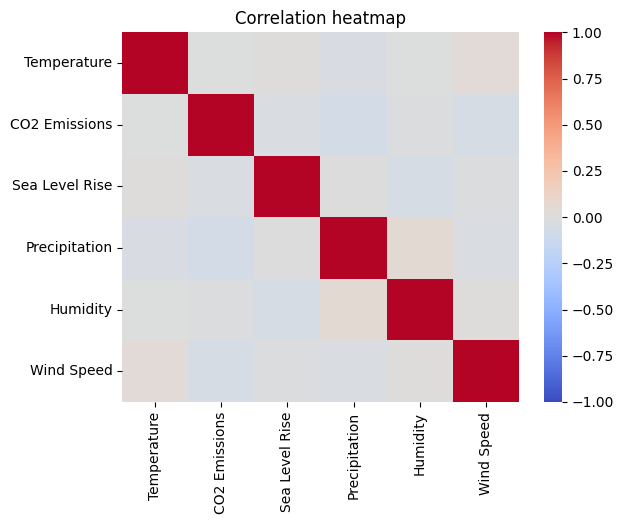

In [81]:
#Correlation Heatmap 2002
corr2002_matrix = sns.heatmap(df_2002.corr(numeric_only=True),cmap='coolwarm', vmin=-1, vmax=1)
corr2002_matrix.set_title("Correlation heatmap");

From the correlation heatmap, it is possible to get that the variables are not related in 2002. This result is aligned with the previous scatter plot.

In [82]:
#Temperature Boxplot 2022
fig = px.box(df_2022, y='Temperature', title='Temperature (°C) Boxplot - 2022')
fig.show()

The higher registered temperature for 2022, was 25.77°C, with a mean of 14.86°C. 50% of the registers are between 11.36°C and 17.97°C. These numbers are pretty similar to the ones for 2002, except by the maximum temperature, which for 2022 is about 5 celsius degrees less.

In [83]:
px.scatter( df_2022,            # Nombre del dataframe.
             x='Sea Level Rise',
             y= 'Precipitation',
             color = 'Temperature',
             size = 'Precipitation',
             title = 'Sea Level Rise, Precipitation and Temperature for 2022',
             labels = {'Sea Level Rise': 'Sea Level Rise (mm)',
                       'Precipitation': 'Precipitation (mm)',
                       'Temperature': 'Temperature °C'
                       })

There is neather a color pattern to identify in this image.

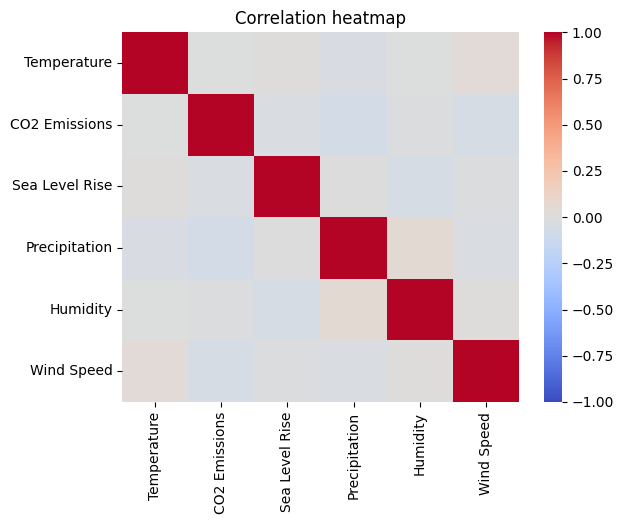

In [84]:
#Correlation Heatmap 2002
corr2022_matrix = sns.heatmap(df_2002.corr(numeric_only=True),cmap='coolwarm', vmin=-1, vmax=1)
corr2022_matrix.set_title("Correlation heatmap");

From the correlation heatmap for 2022, it is possible to get that the variables are not related. This result is also aligned with the previous scatter plot.

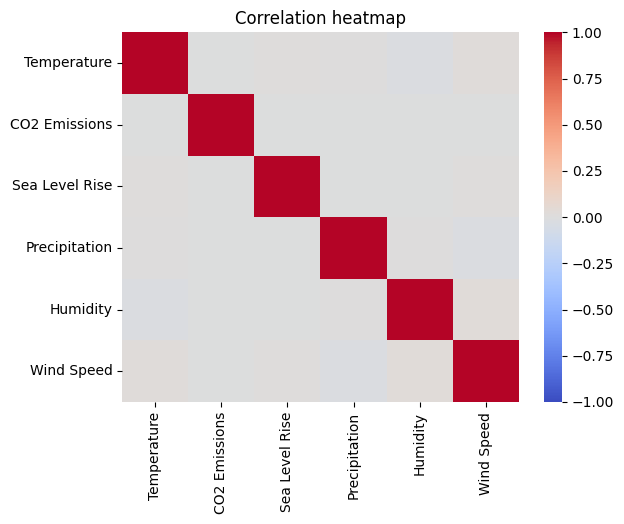

In [85]:
#General Correlation Heatmap
corr_matrix = sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm', vmin=-1, vmax=1)
corr_matrix.set_title("Correlation heatmap");

The purpose of this correlation heatmap is to check if in the whole dataset, there is a relation that can be detected, taking into account the ammount of data. Anyway, it seems there is not a significant correlation between the variables.

**Is there a significative difference between the means of the Temperature for both of the years?**

In [92]:
z_score, p_valor = sm.stats.ztest(df_2002['Temperature'], df_2022['Temperature'],         # Las dos muestras
                                  value=0,                # La dif=0 es la hipótesis nula
                                  alternative='two-sided' # dos colas
                                  )
p_valor

0.9534491036237326

The hypothesis testing is the Z one, because of the size of the sample sizes.

In [93]:
(p_valor>0) & (p_valor<1-0.95)

False

When testing the p value with a 95% of trust level, it is possible to conclude that there is not a significative difference between both of the temperature means for 2002 and 2022.

# **Conclusions**
* Different from what was expected, a significant correlation cannot be identified between any of the variables for the years 2002 and 2022. A possible explanation is the irregularity of the measurements, since it is evident that these were taken at different times and dates, without any obvious periodicity. Taking into account that this type of data varies constantly throughout a day, it is correct to define that following their behavior without measuring them at exact times will not generate precise conclusions.

* For the temperature averages, no difference is found for the years 2002 and 2022. This conclusion is also unexpected, since it was expected to show an increase in temperature. However, it is known that climate is a large-scale phenomenon with very high variability, and surface temperature can be affected by both microclimate phenomena and larger-scale phenomena such as ENSO. It is therefore recommended to carry out studies that have more periodic information on hours of measurements, in addition to expanding the range, since this phenomenon increases on a larger scale over a range of years and even centuries.